# P1 - Ricardo Peres e Victor Vazquez.

In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

### Objetivo:
O objetivo deste estudo é analisar o perfil das pessoas economicamente ativas focando na diferença entre a renda de homens e mulheres considerando também os parâmetros idade e unidade federativa. Além disso fazer uma comparação entre os resultados obtidos de diferença salárial entre homens e mulheres nos estados nos anos de 2011 e 2015.

In [129]:
dados2015 = pd.read_csv("PES2015.csv")

In [130]:
d15 = dados2015[["UF",'V0302',"V8005","V9532"]]
d15.columns = ["UF","Sexo","Idade","Renda"]
d15 = d15.loc[(d15["Idade"]>= 14)]
d15 = d15.loc[(d15["Renda"] > 0) & (d15["Renda"] <999999999999)]

### Explicação do código:
No código acima decidimos que a idade mínima que seria útil para a análise é a de 14 anos pois inclui todos os trabalhadores legalizados (menores aprendizes). Além disso o filtro de renda foi realizado de forma a excluir os n/a e os que possuem renda não declarada que está representada por pelo número 999999999999.

### Parâmetro idade 2015:

count    152132.000000
mean         38.951976
std          13.041330
min          14.000000
25%          29.000000
50%          38.000000
75%          49.000000
max          95.000000
Name: Idade, dtype: float64

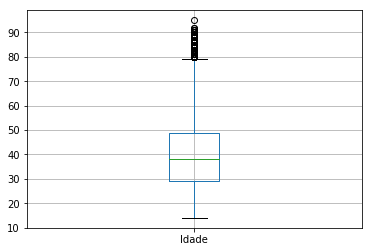

In [131]:
d15.Idade.plot.box()
plt.grid()
d15.Idade.describe()

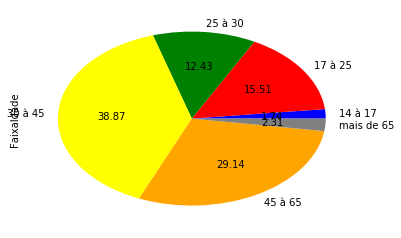

In [132]:
d15.loc[(d15.Idade > 14) & (d15.Idade <= 17), "FaixaIdade"] = "14 à 17"
d15.loc[(d15.Idade > 17) & (d15.Idade <= 25), "FaixaIdade"] = "17 à 25"
d15.loc[(d15.Idade > 25) & (d15.Idade <= 30), "FaixaIdade"] = "25 à 30"
d15.loc[(d15.Idade > 30) & (d15.Idade <= 45), "FaixaIdade"] = "30 à 45"
d15.loc[(d15.Idade > 45) & (d15.Idade <= 65), "FaixaIdade"] = "45 à 65"
d15.loc[(d15.Idade > 65), "FaixaIdade"] = "mais de 65"

idade15 = d15.FaixaIdade.value_counts().reindex(["14 à 17","17 à 25","25 à 30","30 à 45","45 à 65","mais de 65"])


idade15.plot(kind = "pie", colors = ("blue", "red","green","yellow","orange","grey"), autopct = "%0.2f" ,legend = False);

### Análise do parâmetro Idade 2015:
Boxplot:
Como podemos ver no boxplot o primeiro, segundo e terceiro quartil possuem concentrações parecidas, porém o quarto quartil abrange uma grande quantidade de idades, possuindo assim menor concentração por faixa. Além disso é perceptível pelas bolinhas acima do quarto quartil que existem diversos outliers, que são prejudiciais para a interpretação dos dados.

Gráfico de pizza:
O gráfico de pizza plotado, está divido em faixas de idade selecionadas com o objetivo de observar qual é a idade da maior parte das pessoas economicamente ativas. 
A faixa que possui maior quantidade de pessoas economicamente ativas é a de "30 à 45" anos seguida pela faixa de "45 à 65", "25 à 30", "17 à 25", "mais de 65" e por fim "14 à 17".

### Parâmetro Sexo 2015:

Homem     88611
Mulher    63521
Name: Sexo, dtype: int64

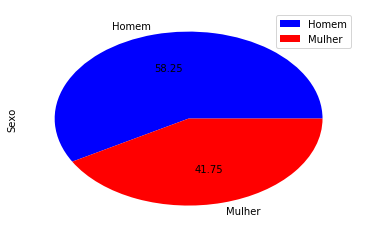

In [133]:
d15.loc[(d15["Sexo"] == 2), "Sexo"] = "Homem"
d15.loc[(d15["Sexo"] == 4), "Sexo"] = "Mulher"
sexo = d15.Sexo.value_counts()
sexo.plot(kind = "pie", colors = ("blue", "red"), autopct = "%0.2f" ,legend = True);
sexo

### Análise do parâmetro Sexo 2015

Analisando o gráfico de pizza plotado acima, é possível concluir que a quantidade de homens economicamente ativos é superior que a de mulheres na mesma situação. Entre outros motivos o fato de uma porcentagem considerável das mulheres participarem de serviço familiar não remunerado comprovam os dados mostrados acima. 

### Parâmetro Unidade Federativa (UF):

In [134]:
d15.loc[(d15.UF>10)&(d15.UF<20), "Regiao"] = "Norte"
d15.loc[(d15.UF>20)&(d15.UF<29), "Regiao"] = "Nordeste"
d15.loc[(d15.UF>30)&(d15.UF<35), "Regiao"] = "Sudeste"
d15.loc[(d15.UF>40)&(d15.UF<43), "Regiao"] = "Sul"
d15.loc[(d15.UF>50)&(d15.UF<54), "Regiao"] = "Centro-Oeste"
d15.head()

,UF,Sexo,Idade,Renda,FaixaIdade,Regiao
0,11,Homem,23,800.0,17 à 25,Norte
1,11,Mulher,23,1150.0,17 à 25,Norte
2,11,Mulher,35,880.0,30 à 45,Norte
3,11,Homem,34,3000.0,30 à 45,Norte
7,11,Mulher,18,880.0,17 à 25,Norte


### Explicação do código
No código acima, para compreender melhor os dados, substituímos os códigos numéricos 2 e 4 pelos ” labels” homem e mulher respectivamente. Além disso mudamos o nome das regiões de acordo com as suas numerações.

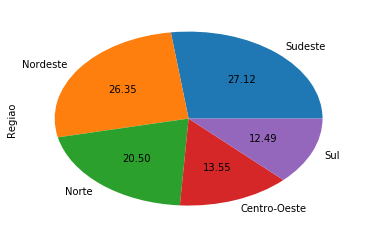

In [135]:
regiao = d15.Regiao.value_counts()
plt.grid()
regiao.plot(kind = "pie", autopct = "%0.2f" ,legend = False);

### Análise do parâmetro Unidade Federativa (UF) atribuído a "Região" 2015
Analisando as informações contidas no gráfico acima, é possível concluir que a maior parte das pessoas economicamente ativas estão na região Sudeste com uma diferença de apenas 0.77% em relação a região Nordeste. As regiões com menos pessoas economicamente ativas são Centro-Oeste e Sul.

###  Parâmetro renda 2015:

In [136]:
d15.loc[(d15.Renda <= 998), "FaixaRenda"] = "até 1"
d15.loc[(d15.Renda > 998) & (d15.Renda <= 1996), "FaixaRenda"] = "1-2"
d15.loc[(d15.Renda > 1996) & (d15.Renda <= 2994), "FaixaRenda"] = "2-3"
d15.loc[(d15.Renda > 2994) & (d15.Renda <= 3992), "FaixaRenda"] = "3-4"
d15.loc[(d15.Renda > 3992), "FaixaRenda"] = "Maior que 4"

### Explicação:
Dividimos o gráfico a baixo em cinco faixas de salários mínimos para poder observar a diferença salarial entre os trabalhadores brasileiros.
Para os sete gráficos de pizza abaixo segue a legenda:
"até 1": Até um salário mínimo.
"1-2": De um a dois salários mínimos.
"2-3": De dois a três salários mínimos.
"3-4": De três a quatro salários mínimos.





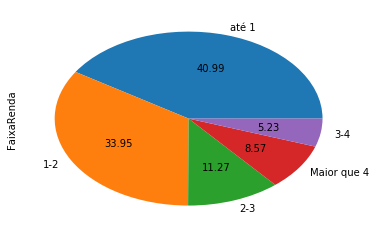

In [137]:
renda = d15.FaixaRenda.value_counts()
renda.plot(kind = "pie", autopct = "%0.2f" ,legend = False);

### Análise do parâmetro Renda 2015:

Analisando as informações contidas no gráfico acima, é possível observar que quase 41% dos trabalhadores recebe, menos de um salário mínimo na região Sudeste com uma diferença de apenas 0.77% em relação a região Nordeste. As regiões com menos pessoas economicamente ativas são Centro-Oeste e Sul.


### Crosstab: Renda média por região 2015.

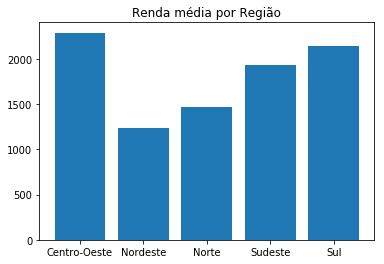

,UF,Sexo,Idade,Renda,FaixaIdade,Regiao,FaixaRenda
0,11,Homem,23,800.0,17 à 25,Norte,até 1
1,11,Mulher,23,1150.0,17 à 25,Norte,1-2
2,11,Mulher,35,880.0,30 à 45,Norte,até 1
3,11,Homem,34,3000.0,30 à 45,Norte,3-4
7,11,Mulher,18,880.0,17 à 25,Norte,até 1


In [138]:
centrooeste = d15[d15.Regiao == "Centro-Oeste"]
mediacentro = centrooeste.Renda.mean()
nordeste = d15[d15.Regiao == "Nordeste"]
mediaNordeste = nordeste.Renda.mean()
norte = d15[d15.Regiao == "Norte"]
mediaNorte = norte.Renda.mean()
sudeste = d15[d15.Regiao == "Sudeste"]
mediaSudeste = sudeste.Renda.mean()
sul = d15[d15.Regiao == "Sul"]
mediaSul = sul.Renda.mean()

medias_rendimento = [mediacentro, mediaNordeste, mediaNorte, mediaSudeste , mediaSul]
regioes = ["Centro-Oeste", "Nordeste", "Norte", "Sudeste","Sul"]
plt.bar(regioes, medias_rendimento)
plt.title("Renda média por Região")
plt.show()

d15.head()

### Análise do Crosstab: Renda média por região 2015:
Como pode ser visto no gráfico de barra acima a região que possui maior média de renda é a região Centro-Oeste. Este dado pode ser explicado pelo fato de esta região envolve o Distrito federal, que por conter a capital do país e grande concentração de cargos públicos possui uma média salarial elevada. Um dado que surpreende, mas pode ser explicado é de a região Sul possuir uma renda média superior a do Sudeste. Isso pode ser explicado pela grande concentração de periferias (onde a renda média é muito baixa) nos dois principais estados da região sudeste , que são: São Paulo e Rio de Janeiro.
O baixo desempenho das regiões Norte e nordeste pode ser explicado pelo fato dessas regiões serem menos desenvolvidas.


### Renda média por faixa de idade 2015:

In [139]:
fo = pd.crosstab(d15.FaixaRenda, d15.FaixaIdade)
fo["14 à 17"]

FaixaRenda
1-2             261
2-3              10
3-4               1
Maior que 4       1
até 1          2376
Name: 14 à 17, dtype: int64

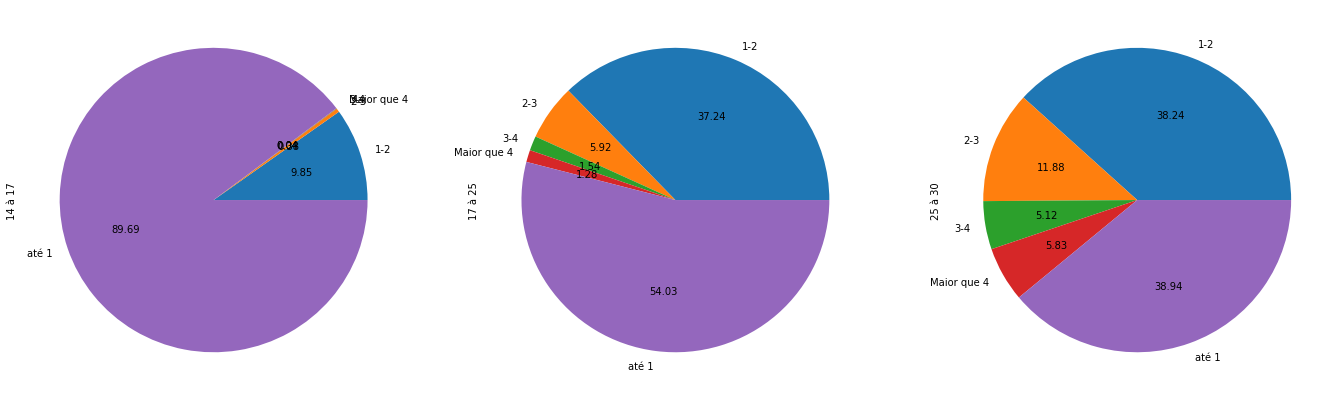

In [140]:
a = 10000
fig = plt.figure(figsize = (40,7))

plt.subplot(151)
plt.ylim(0, a)
fo["14 à 17"].plot(kind = "pie", autopct = "%0.2f" ,legend = False);

plt.subplot(152)
plt.ylim(0, a)
fo["17 à 25"].plot(kind = "pie", autopct = "%0.2f" ,legend = False);

plt.subplot(153)
plt.ylim(0, a)
fo["25 à 30"].plot(kind = "pie", autopct = "%0.2f" ,legend = False);

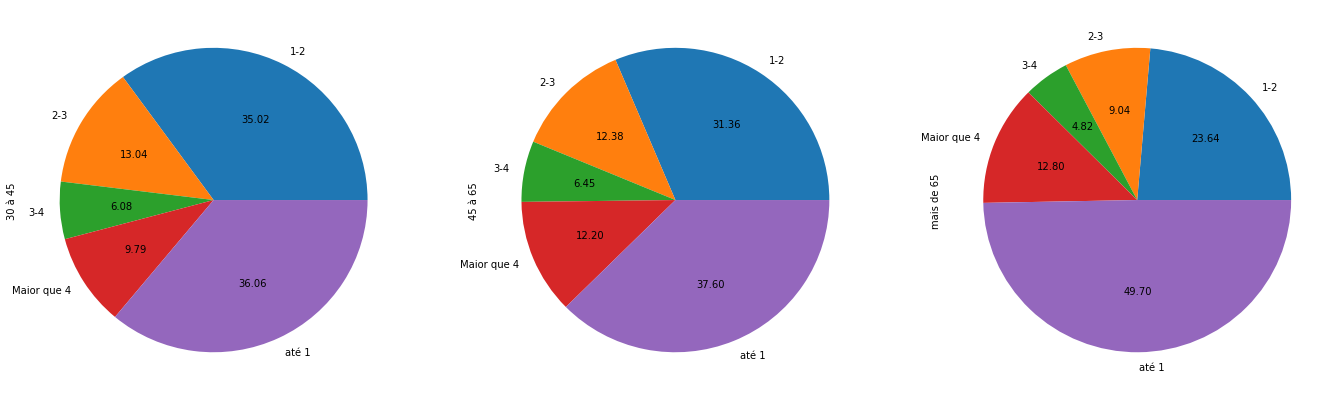

In [141]:
fig = plt.figure(figsize = (40,7))

plt.subplot(151)
plt.ylim(0, a)
fo["30 à 45"].plot(kind = "pie", autopct = "%0.2f" ,legend = False);

plt.subplot(152)
plt.ylim(0, a)
fo["45 à 65"].plot(kind = "pie", autopct = "%0.2f" ,legend = False);

plt.subplot(153)
plt.ylim(0, a)
fo["mais de 65"].plot(kind = "pie", autopct = "%0.2f" ,legend = False);

### Análise dos gráficos: Renda média por faixa de idade 2015.
Explorando os gráficos acima, podemos ver que para todas as faixas de idade a renda mais frequente é de menos de um salário mínimo. Além disso, é possível verificar em todos os gráficos uma progressão de renda conforme a idade aumenta até os 65 anos quando começa a cair de novo.

### Crosstab: Renda média por Sexo por Região 2015.

In [142]:
sulH = d15.loc[(d15.Regiao == "Sul") & (d15.Sexo == "Homem")]
sulmediaH = sulH.Renda.mean()

sulM = d15.loc[(d15.Regiao == "Sul") & (d15.Sexo == "Mulher")]
sulmediaM = sulM.Renda.mean()

sudesteH = d15.loc[(d15.Regiao == "Sudeste") & (d15.Sexo == "Homem")]
sudestemediaH = sudesteH.Renda.mean()

sudesteM = d15.loc[(d15.Regiao == "Sudeste") & (d15.Sexo == "Mulher")]
sudestemediaM = sudesteM.Renda.mean()

centrooesteH = d15.loc[(d15.Regiao == "Centro-Oeste") & (d15.Sexo == "Homem")]
mediacentroH = centrooesteH.Renda.mean()

centrooesteM = d15.loc[(d15.Regiao == "Centro-Oeste") & (d15.Sexo == "Mulher")]
mediacentroM = centrooesteM.Renda.mean()

nordesteH = d15.loc[(d15.Regiao == "Nordeste") & (d15.Sexo == "Homem")]
nordestemediaH = nordesteH.Renda.mean()

nordesteM = d15.loc[(d15.Regiao == "Nordeste") & (d15.Sexo == "Mulher")]
nordestemediaM = nordesteM.Renda.mean()


norteH = d15.loc[(d15.Regiao == "Norte") & (d15.Sexo == "Homem")]
nortemediaH = norteH.Renda.mean()

norteM = d15.loc[(d15.Regiao == "Norte") & (d15.Sexo == "Mulher")]
nortemediaM = norteM.Renda.mean()


medias_rendimento = [mediacentro, mediaNordeste, mediaNorte, mediaSudeste , mediaSul]
regioes = ["Sul","Sudeste","Centro-Oeste", "Nordeste", "Norte"]

Média da difença salárial no Brasil é de 478 reais


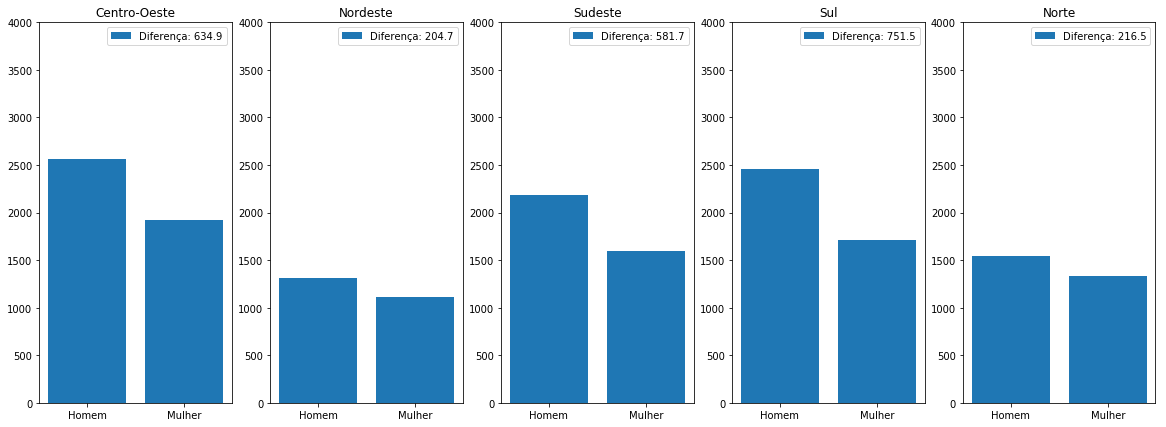

In [149]:
sexo = ["Homem", "Mulher"]
fig = plt.figure(figsize = (20,7))
ysize = 4000

plt.subplot(154)
plt.bar(sexo, [sulmediaH, sulmediaM], label = "Diferença: " + str(sulmediaH -sulmediaM)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Sul")

plt.subplot(153)
plt.bar(sexo, [sudestemediaH, sudestemediaM], label = "Diferença: " + str(sudestemediaH - sudestemediaM)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Sudeste")
 
plt.subplot(151)
plt.bar(sexo, [mediacentroH, mediacentroM], label = "Diferença: " + str(mediacentroH - mediacentroM)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Centro-Oeste")

plt.subplot(152)
plt.bar(sexo, [nordestemediaH, nordestemediaM], label = "Diferença: "+ str(nordestemediaH - nordestemediaM)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Nordeste")


plt.subplot(155)
plt.bar(sexo, [nortemediaH, nortemediaM],label = "Diferença: "+ str(nortemediaH - nortemediaM)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Norte")

plt.show()

### Análise do Crosstab: Renda média por Sexo por Região 2015.

Observando os gráficos acima, é possível verificar que em todas as regiões, a renda média das mulheres é inferior à dos homens. A diferença salarial é maior nas regiões Sul, Centro-Oeste e Sudeste e menor nas regiões Norte e Nordeste. A média da diferença salarial no Brasil é de 478 reais

###  Crosstab: Renda média por Sexo por Região 2011.

In [144]:
dados2011 = pd.read_csv("PES2011.csv")  
d11 = dados2011[["UF",'V0302',"V9532"]]
d11.columns = ["UF","Sexo","Renda"]
d11 = d11.loc[(d11["Renda"] > 0) & (d11["Renda"] <999999999999)]

In [145]:
d11.loc[(d11["Sexo"] == 2), "Sexo"] = "Homem"
d11.loc[(d11["Sexo"] == 4), "Sexo"] = "Mulher"
sexo11 = d11.Sexo.value_counts()

In [146]:
d11.loc[(d11.UF>10)&(d11.UF<20), "Regiao"] = "Norte"
d11.loc[(d11.UF>20)&(d11.UF<29), "Regiao"] = "Nordeste"
d11.loc[(d11.UF>30)&(d11.UF<35), "Regiao"] = "Sudeste"
d11.loc[(d11.UF>40)&(d11.UF<43), "Regiao"] = "Sul"
d11.loc[(d11.UF>50)&(d11.UF<54), "Regiao"] = "Centro-Oeste"

In [147]:
sulH11 = d11.loc[(d11.Regiao == "Sul") & (d11.Sexo == "Homem")]
sulmediaH11 = sulH11.Renda.mean()

sulM11 = d11.loc[(d11.Regiao == "Sul") & (d11.Sexo == "Mulher")]
sulmediaM11 = sulM11.Renda.mean()

sudesteH11 = d11.loc[(d11.Regiao == "Sudeste") & (d11.Sexo == "Homem")]
sudestemediaH11 = sudesteH11.Renda.mean()

sudesteM11 = d11.loc[(d11.Regiao == "Sudeste") & (d11.Sexo == "Mulher")]
sudestemediaM11 = sudesteM11.Renda.mean()

centrooesteH11 = d11.loc[(d11.Regiao == "Centro-Oeste") & (d11.Sexo == "Homem")]
mediacentroH11 = centrooesteH11.Renda.mean()

centrooesteM11 = d11.loc[(d11.Regiao == "Centro-Oeste") & (d11.Sexo == "Mulher")]
mediacentroM11 = centrooesteM11.Renda.mean()

nordesteH11 = d11.loc[(d11.Regiao == "Nordeste") & (d11.Sexo == "Homem")]
nordestemediaH11 = nordesteH11.Renda.mean()

nordesteM11 = d11.loc[(d11.Regiao == "Nordeste") & (d11.Sexo == "Mulher")]
nordestemediaM11 = nordesteM11.Renda.mean()


norteH11 = d11.loc[(d11.Regiao == "Norte") & (d11.Sexo == "Homem")]
nortemediaH11 = norteH11.Renda.mean()

norteM11 = d11.loc[(d11.Regiao == "Norte") & (d11.Sexo == "Mulher")]
nortemediaM11 = norteM11.Renda.mean()


medias_rendimento11 = [mediacentro, mediaNordeste, mediaNorte, mediaSudeste , mediaSul]
regioes11 = ["Sul","Sudeste","Centro-Oeste", "Nordeste", "Norte"]

Media


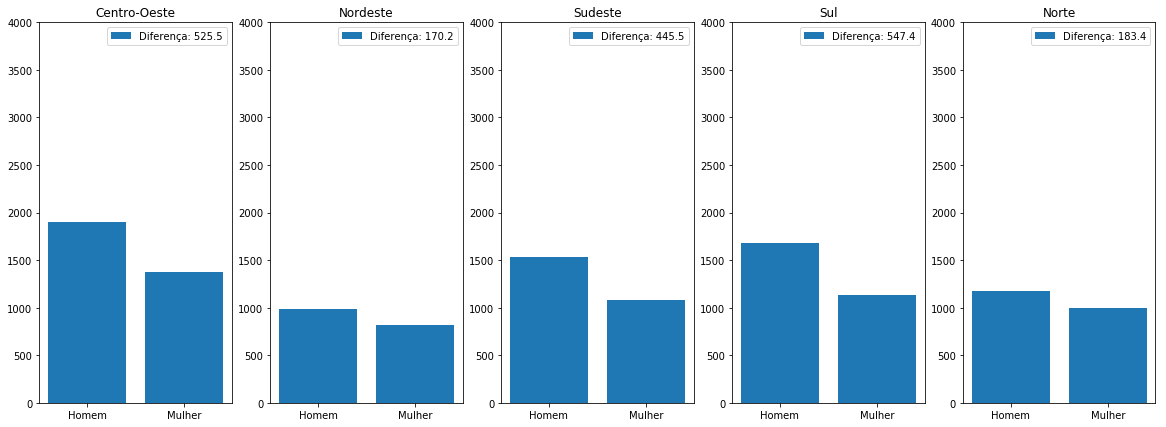

Média da difença salárial no Brasil é de 374 reais


In [152]:
sexo = ["Homem", "Mulher"]
fig = plt.figure(figsize = (20,7))
ysize = 4000

plt.subplot(154)
plt.bar(sexo, [sulmediaH11, sulmediaM11], label = "Diferença: " + str(sulmediaH11 -sulmediaM11)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Sul")

plt.subplot(153)
plt.bar(sexo, [sudestemediaH11, sudestemediaM11], label = "Diferença: " + str(sudestemediaH11 - sudestemediaM11)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Sudeste")
 
plt.subplot(151)
plt.bar(sexo, [mediacentroH11, mediacentroM11], label = "Diferença: " + str(mediacentroH11 - mediacentroM11)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Centro-Oeste")

plt.subplot(152)
plt.bar(sexo, [nordestemediaH11, nordestemediaM11], label = "Diferença: "+ str(nordestemediaH11 - nordestemediaM11)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Nordeste")


plt.subplot(155)
plt.bar(sexo, [nortemediaH11, nortemediaM11],label = "Diferença: "+ str(nortemediaH11 - nortemediaM11)[:5])
plt.ylim(0, ysize)
plt.legend()
plt.title("Norte")

print("Media")
plt.show()

### Análise do Crosstab: Renda média por Sexo por Região 2011.

Observando os gráficos acima, é possível verificar que em todas as regiões, a renda média das mulheres é inferior à dos homens. A diferença salarial é maior nas regiões Sul, Centro-Oeste e Sudeste e menor nas regiões Norte e Nordeste. A média da diferença salarial no Brasil é de 374 reais

### Conclusões:
   De acordo com o que foi feito no trabalho pudemos observar que em todas as faixas etárias, a renda predominante é menor do que um salário mínimo o que pode ser explicado pelo fato do Brasil ser um país que possui precariedade em diversos setores como por exemplo a educação que influenciam diretamente na qualificação da mão de obra e consequentemente dos salários baixos. 
   
   Também foi possível concluir que a região sudeste mesmo possuindo a maior quantidade de pessoas economicamente ativas e grandes polos industriais e de negócios, não possui a maior média de renda entre os estados o que pode ser explicado pela grande quantidade de pessoas morando em favelas por falta de oportunidade onde a renda média é muito baixa, como por exemplo nos estados de São Paulo e Rio de Janeiro. Segundo aos dados, a região Centro-Oeste possui a maior média de renda o que pode ser explicado pelo fato de que a capital do país está localizada nesta região onde os cargos públicos são predominantes o que gera uma renda média elevada.
   
Analisando a relação faixa-etária/renda foi possível verificar que a renda média é menor do que um salário mínimo em todas as faixas-etárias, mas que a renda aumenta conforme o envelhecimento da população até os 65 anos quando ocorre uma pequena queda que acontece devido à falta de procura por trabalhadores com idade avançada. 
    
Averiguando as diferenças salariais entre os homens e mulheres nas diferentes regiões do país, é possível verificar tanto no ano de 2011 como no ano de 2015 que os homens têm renda superior a das mulheres em todas as regiões sendo esta diferença maior nas regiões Sul, Centro-Oeste e Sudeste e menor nas regiões Nordeste e Norte. Isso se deve ao fato de que as regiões Sul, Centro-Oeste e Sudeste possuem mais ambientes de empresas e industrias onde por conta de uma visão machista da sociedade as mulheres são segunda opção em relação aos homens uma vez que se as mesmas tiverem filhos teriam que optar por uma jornada dupla em que a mulher além de trabalhar cuidaria dos filhos e da casa sendo menos produtiva para as corporações. Além a diferença da renda também pode ser explicada devida a entrada tardia das mulheres no mercado de trabalho e a dificuldade da sociedade em aceitar mulheres em cargos mais elevados.
    
Algo surpreendente que observamos foi que comparando as diferenças de renda nas regiões entre os homens e mulheres em 2011 e 2015, o que o ocorreu em todos os casos foi o aumento desta diferença. Além disso em todas as regiões a ordem continuou a mesma. Este fato é inesperado pois o que observamos na sociedade ao longo dos últimos anos é um ganho de voz da mulher e a tentativa de um reconhecimento e de igualdade para com as mulheres. 

Isso mostra que a nossa sociedade precisa de mais esforço para que a igualdade de renda entre homens mulheres seja alcançada afim de vivermos em uma sociedade mais justa e igualitária.  

### Fontes:
https://www1.folha.uol.com.br/mercado/2017/02/1861675-20-estados-tiveram-renda-per-capita-abaixo-da-media-em-2016-diz-ibge.shtml
https://www.google.com/search?q=mapa+do+brasil+por+estados&tbm=isch&source=iu&ictx=1&fir=iespw0pA8t4ZtM%253A%252CSYvU5vru4xCFkM%252C_&vet=1&usg=AI4_-kRghQzrSNJDMZMSNhYm7HnnXoccTw&sa=X&ved=2ahUKEwiPm9XCsO7gAhWqJ7kGHVAWBmAQ9QEwAHoECAAQBA#imgrc=iespw0pA8t4ZtM:
https://www.catho.com.br/salario/action/artigos/As_diferencas_salariais_entre_Homens_e_Mulheres.php